In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib
import streamlit as st
import os


In [ ]:
#import sys
#print(sys.executable)

c:\Users\dougl\anaconda3\envs\data_project\python.exe


In [158]:
data = pd.read_excel("Employees.xlsx")

In [121]:
data.head(3)

,No,First Name,Last Name,Gender,Start Date,Years,Department,Country,Center,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours
0,1,Ghadir,Hmshw,Male,2018-04-04,2,Quality Control,Egypt,West,1560,18720,3.0,1,0,183
1,2,Omar,Hishan,Male,2020-05-21,0,Quality Control,Saudi Arabia,West,3247,38964,1.0,0,5,198
2,3,Ailya,Sharaf,Female,2017-09-28,3,Major Mfg Projects,Saudi Arabia,West,2506,30072,2.0,0,3,192


In [159]:
data.tail(3)

,No,First Name,Last Name,Gender,Start Date,Years,Department,Country,Center,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours
686,687,Khalil,Alkalu,Male,2017-07-11,3,Facilities/Engineering,Egypt,North,2819,33828,5.0,0,0,0
687,688,Muhamad,Shrbjy,Male,2018-05-30,2,Creative,Egypt,North,2069,24828,3.0,0,0,10
688,689,Abd Albasit,AlAhmar,Male,2020-08-05,0,IT,United Arab Emirates,North,2606,31272,5.0,0,0,0


In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   No              689 non-null    int64         
 1   First Name      689 non-null    object        
 2   Last Name       689 non-null    object        
 3   Gender          689 non-null    object        
 4   Start Date      689 non-null    datetime64[ns]
 5   Years           689 non-null    int64         
 6   Department      689 non-null    object        
 7   Country         689 non-null    object        
 8   Center          689 non-null    object        
 9   Monthly Salary  689 non-null    int64         
 10  Annual Salary   689 non-null    int64         
 11  Job Rate        689 non-null    float64       
 12  Sick Leaves     689 non-null    int64         
 13  Unpaid Leaves   689 non-null    int64         
 14  Overtime Hours  689 non-null    int64         
dtypes: dat

In [161]:
data.shape

(689, 15)

In [162]:
data.isna().sum()

No                0
First Name        0
Last Name         0
Gender            0
Start Date        0
Years             0
Department        0
Country           0
Center            0
Monthly Salary    0
Annual Salary     0
Job Rate          0
Sick Leaves       0
Unpaid Leaves     0
Overtime Hours    0
dtype: int64

In [163]:
#data.dropna(inplace=True) For dropping NA values in the dataset

In [164]:
data.duplicated().sum()

np.int64(0)

In [165]:
#data.drop_duplicates(inplace=True) For drop duplicates

In [166]:
data.head(3)

,No,First Name,Last Name,Gender,Start Date,Years,Department,Country,Center,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours
0,1,Ghadir,Hmshw,Male,2018-04-04,2,Quality Control,Egypt,West,1560,18720,3.0,1,0,183
1,2,Omar,Hishan,Male,2020-05-21,0,Quality Control,Saudi Arabia,West,3247,38964,1.0,0,5,198
2,3,Ailya,Sharaf,Female,2017-09-28,3,Major Mfg Projects,Saudi Arabia,West,2506,30072,2.0,0,3,192


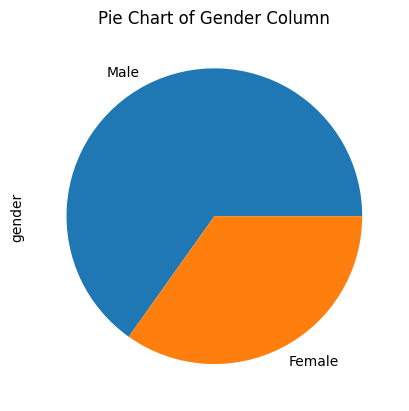

In [167]:
data["Gender"].value_counts().sort_values(ascending=False).plot(kind="pie")
plt.title("Pie Chart of Gender Column")
plt.ylabel("gender")
plt.show()

In [168]:
data.head(2)

,No,First Name,Last Name,Gender,Start Date,Years,Department,Country,Center,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours
0,1,Ghadir,Hmshw,Male,2018-04-04,2,Quality Control,Egypt,West,1560,18720,3.0,1,0,183
1,2,Omar,Hishan,Male,2020-05-21,0,Quality Control,Saudi Arabia,West,3247,38964,1.0,0,5,198


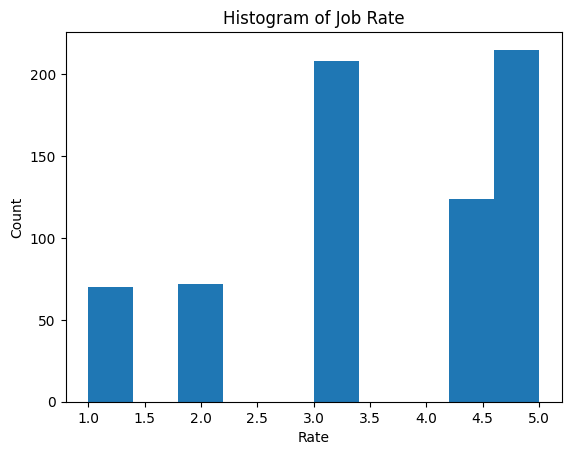

In [169]:
plt.hist(data["Job Rate"])
plt.title("Histogram of Job Rate")
plt.xlabel("Rate")
plt.ylabel("Count")
plt.show()

In [170]:
data["Job Rate"].describe()

count    689.000000
mean       3.586357
std        1.350125
min        1.000000
25%        3.000000
50%        3.000000
75%        5.000000
max        5.000000
Name: Job Rate, dtype: float64

In [171]:
data.head(3)

,No,First Name,Last Name,Gender,Start Date,Years,Department,Country,Center,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours
0,1,Ghadir,Hmshw,Male,2018-04-04,2,Quality Control,Egypt,West,1560,18720,3.0,1,0,183
1,2,Omar,Hishan,Male,2020-05-21,0,Quality Control,Saudi Arabia,West,3247,38964,1.0,0,5,198
2,3,Ailya,Sharaf,Female,2017-09-28,3,Major Mfg Projects,Saudi Arabia,West,2506,30072,2.0,0,3,192


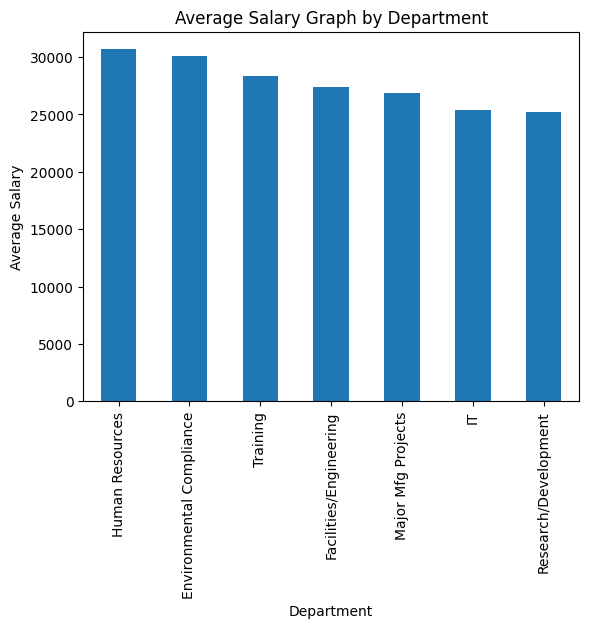

In [172]:
data.groupby("Department")["Annual Salary"].mean().sort_values(ascending=False).head(7).plot(kind="bar")
plt.title("Average Salary Graph by Department")
plt.xlabel("Department")
plt.ylabel("Average Salary")
plt.show()

In [173]:
data.groupby("Center")["Monthly Salary"].mean().sort_values(ascending=False)

Center
East     2274.021277
West     2068.672269
North    2064.811594
Main     2054.776892
South    1981.153846
Name: Monthly Salary, dtype: float64

In [174]:
data["Country"].unique()

array(['Egypt', 'Saudi Arabia', 'United Arab Emirates', 'Syria',
       'Lebanon'], dtype=object)

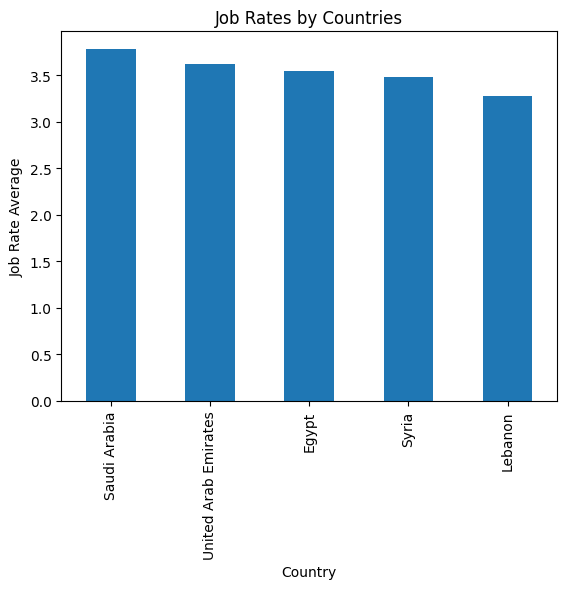

In [175]:
data.groupby("Country")["Job Rate"].mean().sort_values(ascending=False).plot(kind="bar")
plt.title("Job Rates by Countries")
plt.xlabel("Country")
plt.ylabel("Job Rate Average")
plt.show()

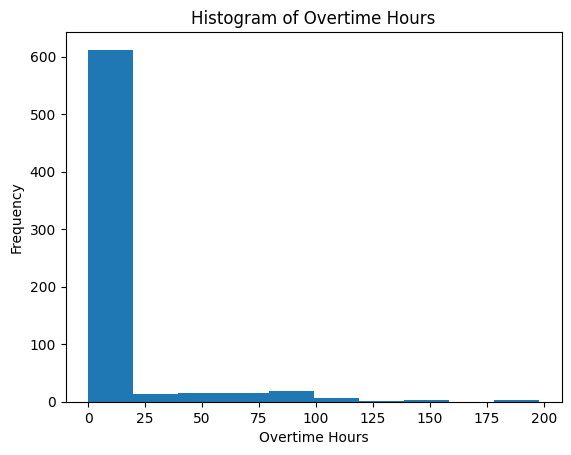

In [176]:
plt.hist(data["Overtime Hours"])
plt.title("Histogram of Overtime Hours")
plt.xlabel("Overtime Hours")
plt.ylabel("Frequency")
plt.show()

In [177]:
data["Overtime Hours"].describe()

count    689.000000
mean      13.702467
std       25.692049
min        0.000000
25%        3.000000
50%        7.000000
75%       10.000000
max      198.000000
Name: Overtime Hours, dtype: float64

In [178]:
data["Annual Salary"].describe()

count      689.000000
mean     24818.420900
std       9159.470878
min       8436.000000
25%      17232.000000
50%      24924.000000
75%      32184.000000
max      41400.000000
Name: Annual Salary, dtype: float64

In [179]:
data.columns

Index(['No', 'First Name', 'Last Name', 'Gender', 'Start Date', 'Years',
       'Department', 'Country', 'Center', 'Monthly Salary', 'Annual Salary',
       'Job Rate', 'Sick Leaves', 'Unpaid Leaves', 'Overtime Hours'],
      dtype='object')

In [ ]:
X= data[["Years", "Job Rate"]]
y =  data["Annual Salary"] 

In [181]:
from sklearn.model_selection import train_test_split

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)

In [183]:
len(y_train)

551

In [184]:
len(X_test)

138

In [185]:
X


,Years,Job Rate
0,2,3.0
1,0,1.0
2,3,2.0
3,2,3.0
4,0,5.0
...,...,...
684,0,2.0
685,0,3.0
686,3,5.0
687,2,3.0


In [186]:
from sklearn.linear_model import LinearRegression

In [187]:
lr = LinearRegression()

In [188]:
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [189]:
predslr = lr.predict(X_test)

In [190]:
from sklearn.metrics import mean_absolute_error

In [192]:
mean_absolute_error(predslr, y_test)

7206.718099398486

In [ ]:

joblib.dump(lr, "Linearmodel.pkl")

O script está sendo executado no diretório: c:\Users\dougl\OneDrive\Desktop\REPOS_COMUNIDADE_DS\Python\Projects_Data_Science_python


['Linearmodel.pkl']